# EDA species imbalance

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from snakeclef.utils import get_spark

spark = get_spark()
display(spark)

Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
24/05/08 17:41:16 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
24/05/08 17:41:16 WARN SparkConf: Note that spark.local.dir will be overridden by the value set by the cluster manager (via SPARK_LOCAL_DIRS in mesos/standalone/kubernetes and LOCAL_DIRS in YARN).


In [3]:
# Path and dataset names
gcs_path = "gs://dsgt-clef-snakeclef-2024/data"
train = "parquet_files/SnakeCLEF2023-train-small_size"

# Define the GCS path to the embedding files
train_gcs_path = f"{gcs_path}/{train}"

# Read the Parquet file into a DataFrame
train_df = spark.read.parquet(train_gcs_path)

# Show the data
train_df.show(n=3)

+--------------------+--------------------+--------------------+----+--------------------+-------------+--------------------+--------------+-------+----+--------+------+
|          image_path|                path|         folder_name|year|       binomial_name|    file_name|                data|observation_id|endemic|code|class_id|subset|
+--------------------+--------------------+--------------------+----+--------------------+-------------+--------------------+--------------+-------+----+--------+------+
|1993/Phrynonax_po...|/SnakeCLEF2023-sm...|SnakeCLEF2023-sma...|1993| Phrynonax_polylepis|102870166.jpg|[FF D8 FF E0 00 1...|      64030606|  false|  EC|    1287| train|
|1995/Acrantophis_...|/SnakeCLEF2023-sm...|SnakeCLEF2023-sma...|1995|Acrantophis_dumerili| 99694826.jpg|[FF D8 FF E0 00 1...|      62240606|   true|  MG|      11| train|
|1996/Ficimia_stre...|/SnakeCLEF2023-sm...|SnakeCLEF2023-sma...|1996|   Ficimia_streckeri| 29265846.jpg|[FF D8 FF E0 00 1...|       2442697|  false|  

In [4]:
from pyspark.sql import functions as F

# Transformation
grouped_train_df = (
    train_df.groupBy(["binomial_name", "observation_id"])
    .agg(F.count("observation_id").alias("n"))
    .orderBy(F.col("n").desc())
)

# Action
grouped_train_df.show()

+--------------------+--------------+---+
|       binomial_name|observation_id|  n|
+--------------------+--------------+---+
|Bothriechis_schle...|       5156122| 71|
|    Clelia_scytalina|      86508209| 44|
|Hierophis_viridif...|      59455956| 38|
|Trimeresurus_pope...|      59124548| 36|
|Gloydius_intermedius|      32829325| 30|
|  Porthidium_nasutum|       5152559| 30|
|    Corallus_batesii|     127314204| 27|
|Bothriechis_schle...|       5152574| 24|
|Trimorphodon_lyro...|     111941207| 21|
|   Imantodes_cenchoa|     143545669| 20|
| Rhabdophis_tigrinus|     126460414| 20|
|  Epicrates_cenchria|     140826380| 20|
|Chironius_grandis...|       5152594| 20|
|     Ninia_teresitae|     121839449| 20|
|  Corallus_blombergi|       5156125| 20|
|Sibynophis_chinensis|       4639353| 20|
| Gloydius_brevicauda|     123481958| 20|
|      Eryx_whitakeri|      67134671| 19|
|     Sibon_sanniolus|       7601657| 19|
| Chironius_scurrulus|      39117085| 19|
+--------------------+------------

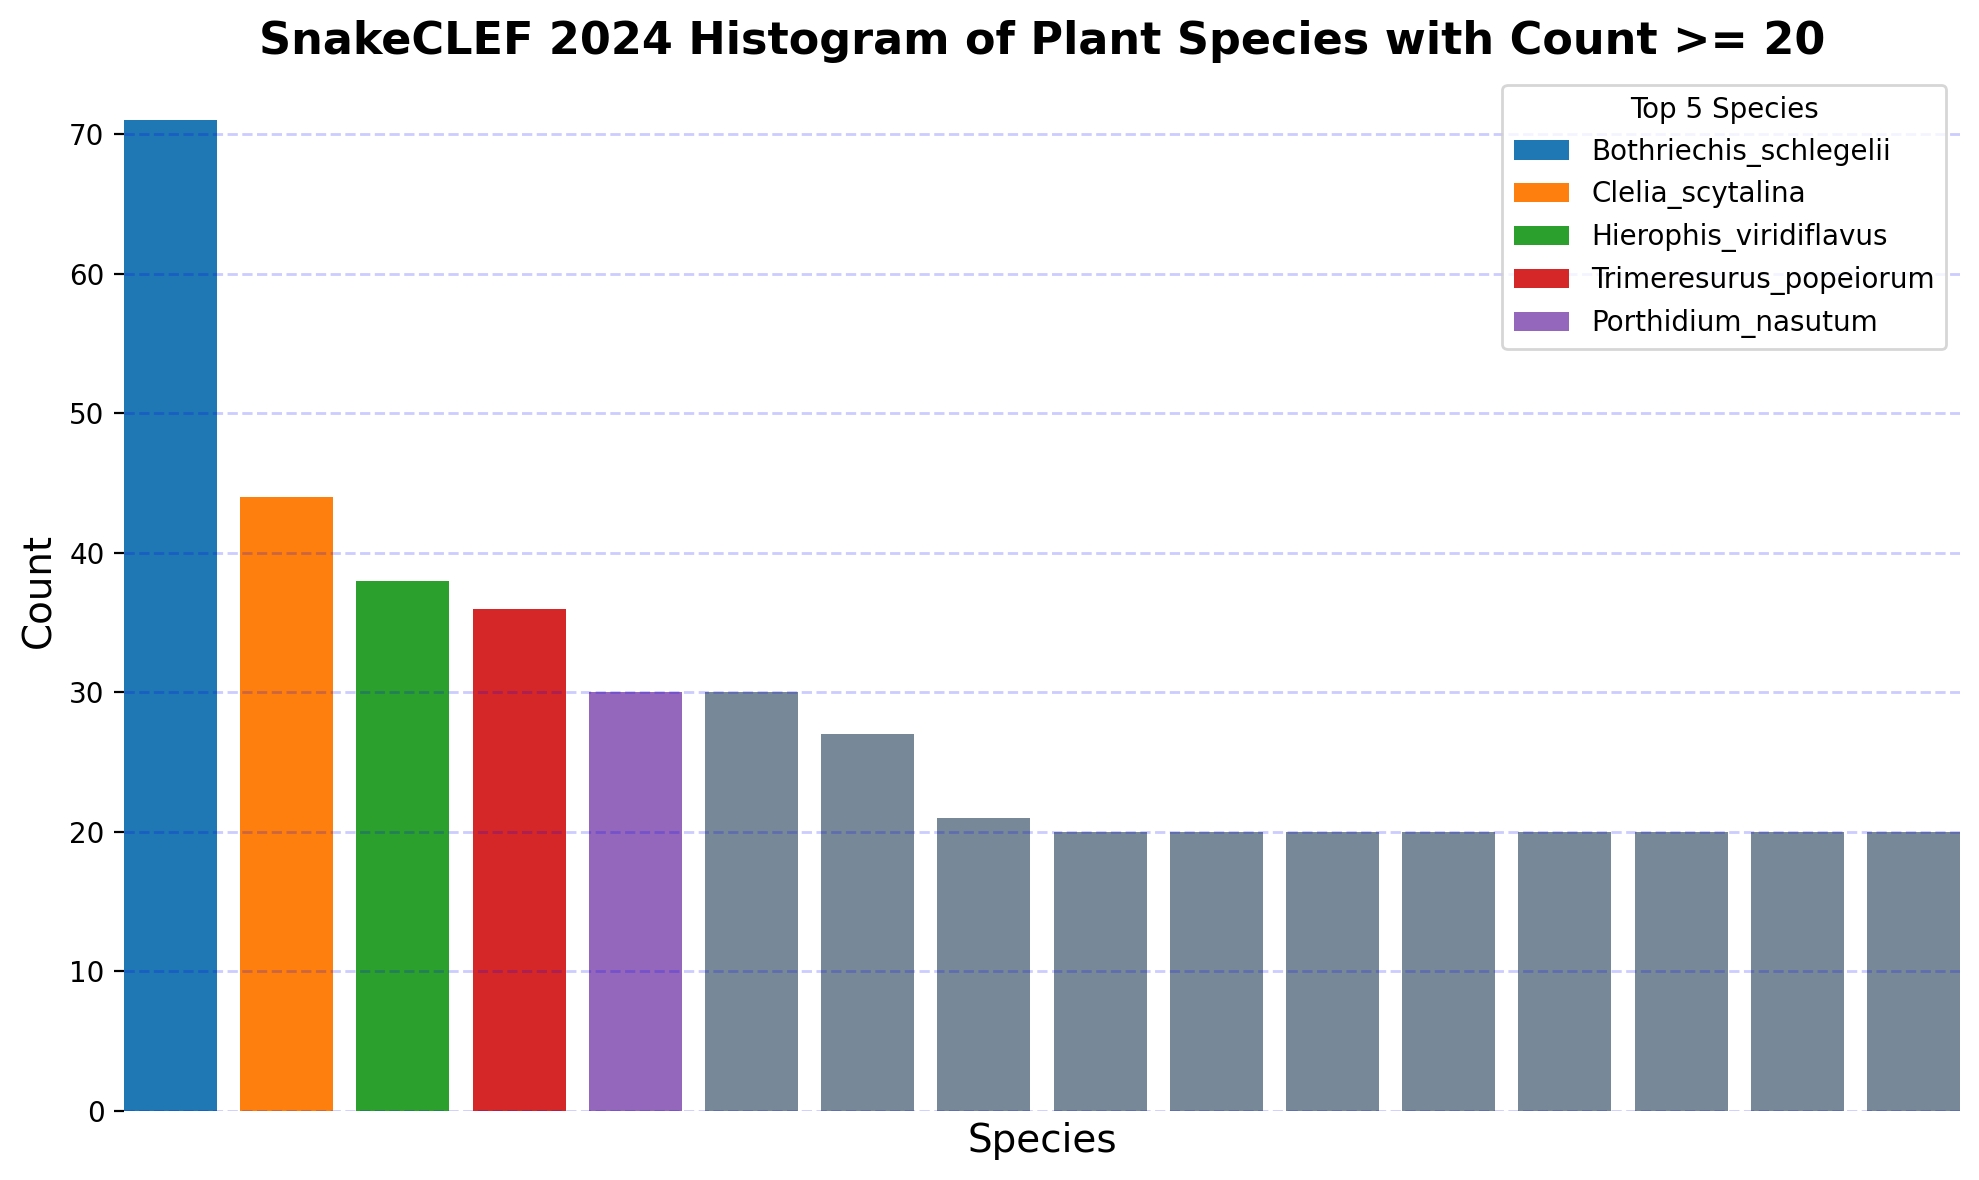

In [5]:
from snakeclef.plotting import plot_species_histogram

# Plot species
plot_species_histogram(df=grouped_train_df, species_count=20)

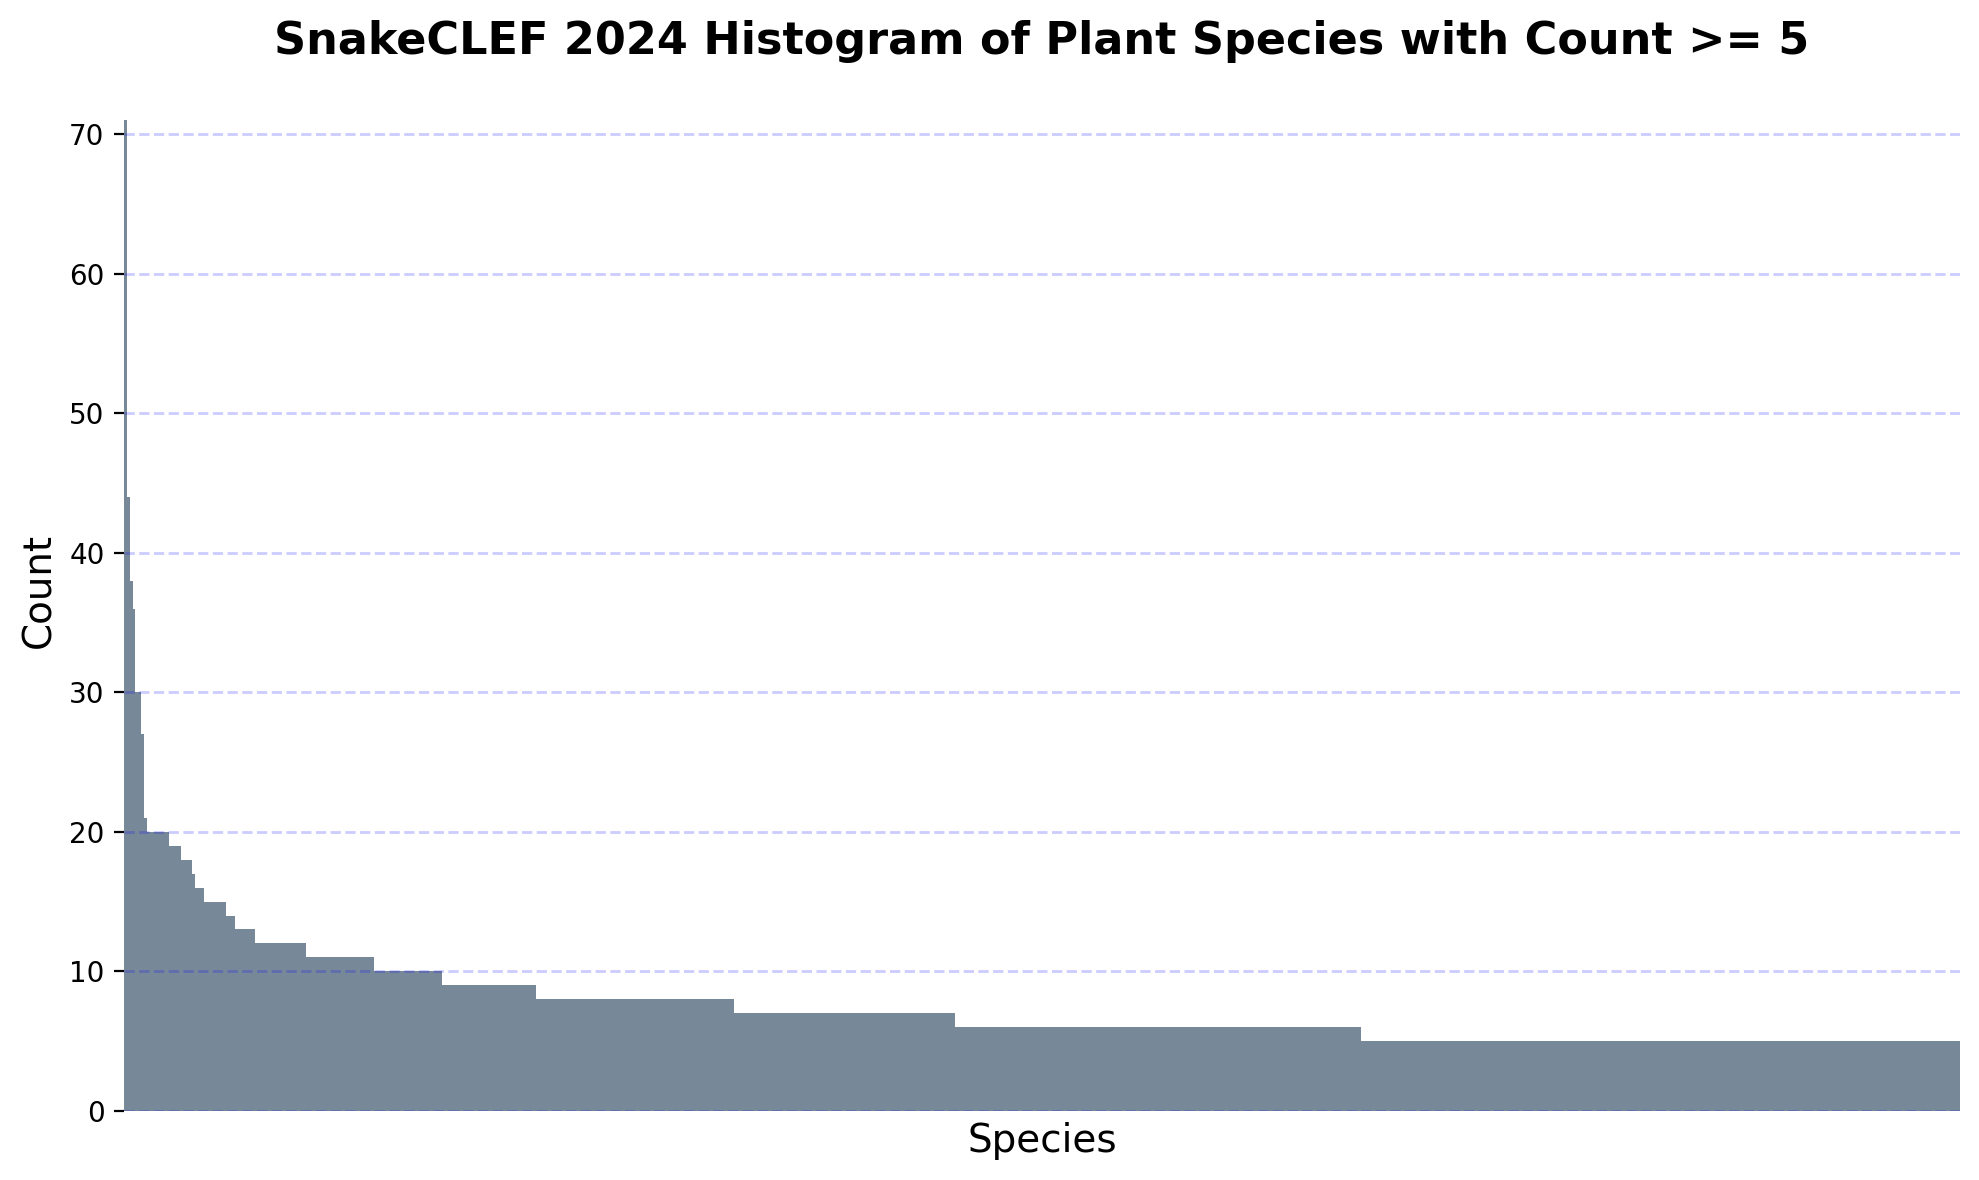

In [6]:
# Plot species with count >= 100
plot_species_histogram(df=grouped_train_df, species_count=5, bar_width=1)

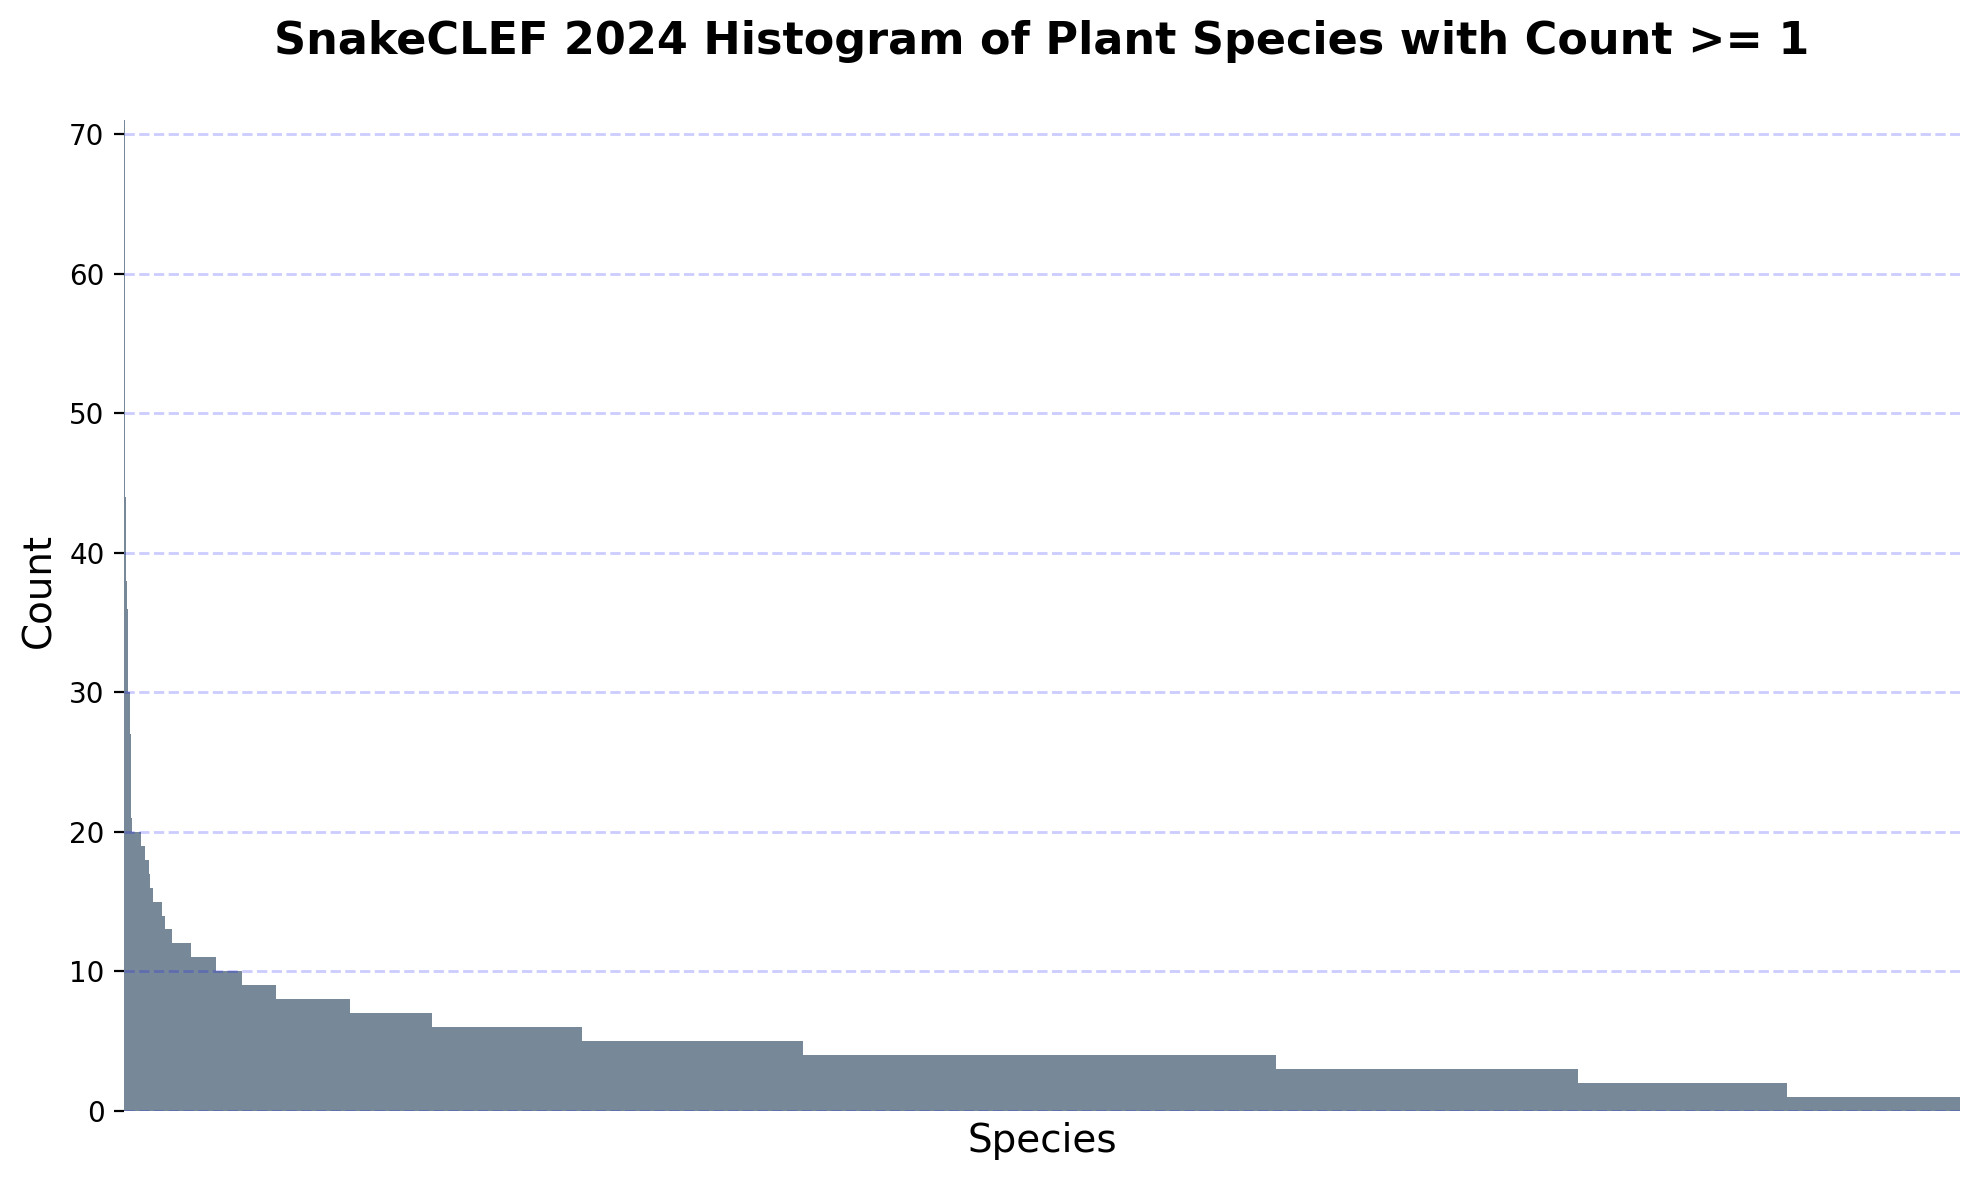

In [7]:
# Plot species with count >= 100
plot_species_histogram(df=grouped_train_df, species_count=1, bar_width=1)